In [2]:
import pandas as pd 
df=pd.read_csv('../data/cleaned/final_atm_data.csv')

In [3]:
df['amount_next_day'] = df.groupby('atm_id')['amount'].shift(-1)

In [4]:
df=df.dropna()

In [5]:
import tsfresh
from tsfresh import extract_features
from tsfresh.feature_extraction.settings import from_columns

In [6]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction.settings import EfficientFCParameters

features = extract_features(
    timeseries_container=df[["atm_id", "date", "amount_next_day"]],
    column_id="atm_id",
    column_sort="date",
    column_value="amount_next_day",
    default_fc_parameters=EfficientFCParameters(),
    impute_function=impute,
    n_jobs=1,
    disable_progressbar=False
)


Feature Extraction: 100%|██████████| 1982/1982 [06:21<00:00,  5.20it/s]


In [7]:
print("Shape of features:", features.shape)
features.head(3)

Shape of features: (1982, 777)


,amount_next_day__variance_larger_than_standard_deviation,amount_next_day__has_duplicate_max,amount_next_day__has_duplicate_min,amount_next_day__has_duplicate,amount_next_day__sum_values,amount_next_day__abs_energy,amount_next_day__mean_abs_change,amount_next_day__mean_change,amount_next_day__mean_second_derivative_central,amount_next_day__median,...,amount_next_day__fourier_entropy__bins_5,amount_next_day__fourier_entropy__bins_10,amount_next_day__fourier_entropy__bins_100,amount_next_day__permutation_entropy__dimension_3__tau_1,amount_next_day__permutation_entropy__dimension_4__tau_1,amount_next_day__permutation_entropy__dimension_5__tau_1,amount_next_day__permutation_entropy__dimension_6__tau_1,amount_next_day__permutation_entropy__dimension_7__tau_1,amount_next_day__query_similarity_count__query_None__threshold_0.0,amount_next_day__mean_n_absolute_max__number_of_maxima_7
1,1.0,0.0,1.0,1.0,4.911012e+07,3.141335e+12,22067.051162,39.473684,-21.480472,38300.0,...,0.284235,0.543980,2.459831,1.743805,3.032291,4.480336,5.831893,6.647382,0.0,162771.428571
2,1.0,0.0,1.0,1.0,9.566119e+07,1.453723e+13,65971.065061,112.093496,-70.345880,97200.0,...,0.740483,1.386352,3.409035,1.789962,3.112066,4.538122,5.791489,6.511757,0.0,368885.714286
4,1.0,0.0,0.0,1.0,1.615051e+08,2.985149e+13,55554.049683,58.823529,-70.561594,136650.0,...,0.292900,0.661851,2.585393,1.718626,2.984286,4.398876,5.706065,6.532080,0.0,528520.135714


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
features_scaled = scaler.fit_transform(features)
features_scaled.head(2)


,amount_next_day__variance_larger_than_standard_deviation,amount_next_day__has_duplicate_max,amount_next_day__has_duplicate_min,amount_next_day__has_duplicate,amount_next_day__sum_values,amount_next_day__abs_energy,amount_next_day__mean_abs_change,amount_next_day__mean_change,amount_next_day__mean_second_derivative_central,amount_next_day__median,...,amount_next_day__fourier_entropy__bins_5,amount_next_day__fourier_entropy__bins_10,amount_next_day__fourier_entropy__bins_100,amount_next_day__permutation_entropy__dimension_3__tau_1,amount_next_day__permutation_entropy__dimension_4__tau_1,amount_next_day__permutation_entropy__dimension_5__tau_1,amount_next_day__permutation_entropy__dimension_6__tau_1,amount_next_day__permutation_entropy__dimension_7__tau_1,amount_next_day__query_similarity_count__query_None__threshold_0.0,amount_next_day__mean_n_absolute_max__number_of_maxima_7
1,0.0,-0.05029,3.698849,0.071211,-1.364259,-1.051577,-1.303719,0.270019,0.252986,-1.565841,...,0.059351,-0.052433,0.197235,-1.355992,-0.717132,-0.381406,-0.106682,0.174241,0.0,-1.460373
2,0.0,-0.05029,3.698849,0.071211,-0.885667,-0.784795,0.555480,0.519665,-0.084678,-0.794383,...,2.672087,2.857159,2.379700,1.031169,0.158594,-0.115216,-0.206446,-0.093300,0.0,-0.553829


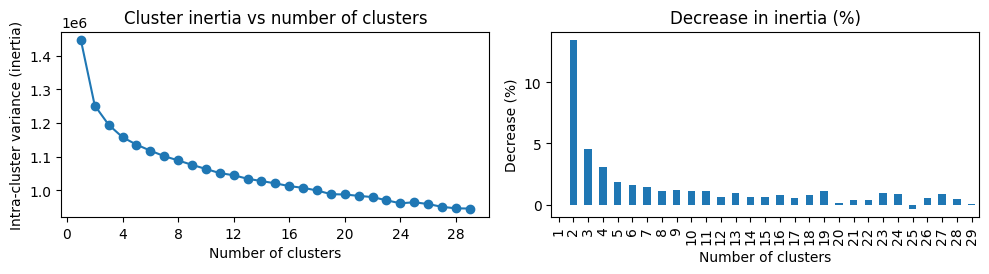

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

range_n_clusters = range(1, 30)
inertias = []
size_of_clusters = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(
        n_clusters=n_clusters,
        n_init=10,
        random_state=963852
    )
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    size_of_clusters.append(np.unique(kmeans.labels_, return_counts=True)[1].tolist())

inertias = pd.Series(inertias, index=range_n_clusters)
decrease_in_inertia = inertias.pct_change() * -100

fig, axs = plt.subplots(1, 2, figsize=(10, 3))
inertias.plot(marker='o', ax=axs[0])
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axs[0].set_title("Cluster inertia vs number of clusters")
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Intra-cluster variance (inertia)')

decrease_in_inertia.plot(kind='bar', ax=axs[1])
axs[1].set_title("Decrease in inertia (%)")
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Decrease (%)')
fig.tight_layout()
plt.show()


In [10]:
for n_clusters, sizes in zip(range_n_clusters, size_of_clusters):
    print(f"Size of clusters (n = {n_clusters}): {sizes}")

Size of clusters (n = 1): [1982]
Size of clusters (n = 2): [1117, 865]
Size of clusters (n = 3): [437, 654, 891]
Size of clusters (n = 4): [855, 573, 427, 127]
Size of clusters (n = 5): [293, 635, 275, 117, 662]
Size of clusters (n = 6): [90, 407, 186, 648, 527, 124]
Size of clusters (n = 7): [266, 235, 381, 59, 115, 570, 356]
Size of clusters (n = 8): [335, 118, 529, 110, 253, 332, 83, 222]
Size of clusters (n = 9): [9, 92, 573, 121, 292, 35, 531, 153, 176]
Size of clusters (n = 10): [362, 37, 140, 56, 330, 563, 146, 10, 89, 249]
Size of clusters (n = 11): [165, 322, 155, 120, 311, 497, 19, 135, 55, 171, 32]
Size of clusters (n = 12): [38, 308, 248, 167, 1, 108, 303, 19, 449, 43, 173, 125]
Size of clusters (n = 13): [57, 263, 386, 124, 95, 58, 237, 225, 120, 33, 235, 10, 139]
Size of clusters (n = 14): [386, 105, 339, 38, 55, 163, 34, 66, 163, 219, 1, 13, 125, 275]
Size of clusters (n = 15): [343, 38, 113, 10, 244, 7, 18, 115, 37, 197, 110, 191, 259, 183, 117]
Size of clusters (n = 16

In [11]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

kmeans = KMeans(n_clusters=6, n_init=10, random_state=963852)
kmeans.fit(features_scaled)

clusters = pd.DataFrame({
    'atm_id': features_scaled.index,
    'cluster_base_on_features': kmeans.predict(features_scaled).astype(str)
})

display(clusters.head(3))

clusters['cluster_base_on_features'].value_counts().to_frame(name='Number of series')


,atm_id,cluster_base_on_features
0,1,1
1,2,1
2,4,3


,Number of series
cluster_base_on_features,
3,648
4,527
1,407
2,186
5,124
0,90


In [12]:
df= pd.merge(
           df.reset_index(),  
           clusters,
           on       ='atm_id',
           how      ='left',
           validate = 'm:1'
       ).set_index('date')

df.head(3)

,index,atm_id,amount,CITY_CODE,region,day_off_discription,dayofyear,sin_day,cos_day,day_of_week,...,atm_is_top10_city,mm7_city,atm_ratio_city_mm7,rolling_max_gap,rolling_min_gap,days_since_last_spike,avg_by_dow,lag_corr_7,amount_next_day,cluster_base_on_features
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0,1,37300.0,780,12,8,1,0.017202,0.999852,5,...,0,42632.653061,1.362135,0.0,0.0,0.0,27622.681014,0.223148,16000.00,1
2022-01-02,1,1,16000.0,780,12,11,2,0.034398,0.999408,6,...,1,45895.918367,1.266842,0.0,0.0,0.0,14087.452791,0.223148,84000.00,1
2022-01-03,2,1,84000.0,780,12,11,3,0.051584,0.998669,0,...,0,49916.326531,1.273274,0.0,1.0,0.0,52893.875167,0.223148,55556.77,1


In [13]:
df=df.drop(columns=['index'])

In [15]:
cluster_data0 = df[df['cluster_base_on_features'] == '0']
cluster_data1 = df[df['cluster_base_on_features'] == '1']
cluster_data2 = df[df['cluster_base_on_features'] == '2']
cluster_data3 = df[df['cluster_base_on_features'] == '3']
cluster_data4 = df[df['cluster_base_on_features'] == '4']
cluster_data5 = df[df['cluster_base_on_features'] == '5']

In [16]:
cluster_data0.to_csv('/kaggle/working/culster0_data.csv')
cluster_data1.to_csv('/kaggle/working/culster1_data.csv')
cluster_data2.to_csv('/kaggle/working/culster2_data.csv')
cluster_data3.to_csv('/kaggle/working/culster3_data.csv')
cluster_data4.to_csv('/kaggle/working/culster4_data.csv')
cluster_data4.to_csv('/kaggle/working/culster5_data.csv')

In [17]:
train_start,train_end='2022-01-01','2024-11-30'
test_start,test_end='2024-12-01','2025-1-21'

In [19]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from catboost import CatBoostRegressor

In [20]:
df = df.sort_index()

In [21]:
cluster_name = '0'
cluster_data = df[df['cluster_base_on_features'] == cluster_name]

X = cluster_data.drop(columns=['amount_next_day', 'cluster_base_on_features'])
y = cluster_data['amount_next_day']

# Keep only numeric features (XGBoost doesn't like non-numeric features without encoding)
X_numeric = X.select_dtypes(include='number')

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

rmse_list = []
mae_list = []
r2_list = []

fold = 1
for train_index, test_index in tscv.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model0 = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
    model0.fit(X_train, y_train)

    y_pred = model0.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    fold += 1

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics
print("\n✅ Cross-validation summary:")
print(f"   • Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"   • Avg MAE : {np.mean(mae_list):.2f}")
print(f"   • Avg R²  : {np.mean(r2_list):.4f}")


Fold 1 - RMSE: 56437.96, MAE: 34692.05, R²: 0.5838
Fold 2 - RMSE: 61523.89, MAE: 39803.71, R²: 0.7566
Fold 3 - RMSE: 36930.67, MAE: 25013.68, R²: 0.7384
Fold 4 - RMSE: 39514.13, MAE: 26758.68, R²: 0.7254
Fold 5 - RMSE: 63778.92, MAE: 40358.27, R²: 0.7521
Fold 6 - RMSE: 39686.97, MAE: 26498.94, R²: 0.7386
Fold 7 - RMSE: 39411.16, MAE: 26765.32, R²: 0.7441
Fold 8 - RMSE: 51605.89, MAE: 34070.12, R²: 0.7262
Fold 9 - RMSE: 57532.62, MAE: 38324.68, R²: 0.7911
Fold 10 - RMSE: 44789.20, MAE: 29701.23, R²: 0.7425

✅ Cross-validation summary:
   • Avg RMSE: 49121.14
   • Avg MAE : 32198.67
   • Avg R²  : 0.7299


In [23]:
cluster_name = '1'
cluster_data = df[df['cluster_base_on_features'] == cluster_name]

X = cluster_data.drop(columns=['amount_next_day', 'cluster_base_on_features'])
y = cluster_data['amount_next_day']

# Keep only numeric features (XGBoost doesn't like non-numeric features without encoding)
X_numeric = X.select_dtypes(include='number')

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

rmse_list = []
mae_list = []
r2_list = []

fold = 1
for train_index, test_index in tscv.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model1 = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
    model1.fit(X_train, y_train)

    y_pred = model1.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    fold += 1

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics
print("\n✅ Cross-validation summary:")
print(f"   • Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"   • Avg MAE : {np.mean(mae_list):.2f}")
print(f"   • Avg R²  : {np.mean(r2_list):.4f}")


Fold 1 - RMSE: 31611.03, MAE: 19489.79, R²: 0.6235
Fold 2 - RMSE: 24906.16, MAE: 17041.00, R²: 0.7318
Fold 3 - RMSE: 24738.28, MAE: 16546.04, R²: 0.7257
Fold 4 - RMSE: 26189.57, MAE: 17425.27, R²: 0.7020
Fold 5 - RMSE: 32014.98, MAE: 20176.79, R²: 0.6549
Fold 6 - RMSE: 26889.67, MAE: 17487.58, R²: 0.6970
Fold 7 - RMSE: 27103.78, MAE: 17669.05, R²: 0.7353
Fold 8 - RMSE: 31240.17, MAE: 20212.14, R²: 0.7035
Fold 9 - RMSE: 27422.39, MAE: 18611.28, R²: 0.7312
Fold 10 - RMSE: 27173.22, MAE: 17963.63, R²: 0.7266

✅ Cross-validation summary:
   • Avg RMSE: 27928.93
   • Avg MAE : 18262.26
   • Avg R²  : 0.7032


In [24]:
cluster_name = '2'
cluster_data = df[df['cluster_base_on_features'] == cluster_name]

X = cluster_data.drop(columns=['amount_next_day', 'cluster_base_on_features'])
y = cluster_data['amount_next_day']

# Keep only numeric features (XGBoost doesn't like non-numeric features without encoding)
X_numeric = X.select_dtypes(include='number')

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

rmse_list = []
mae_list = []
r2_list = []

fold = 1
for train_index, test_index in tscv.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model2 = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
    model2.fit(X_train, y_train)

    y_pred = model2.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    fold += 1

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics
print("\n✅ Cross-validation summary:")
print(f"   • Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"   • Avg MAE : {np.mean(mae_list):.2f}")
print(f"   • Avg R²  : {np.mean(r2_list):.4f}")


Fold 1 - RMSE: 102754.18, MAE: 69821.01, R²: 0.6370
Fold 2 - RMSE: 92176.06, MAE: 61120.88, R²: 0.6412
Fold 3 - RMSE: 88900.43, MAE: 60633.12, R²: 0.6676
Fold 4 - RMSE: 94025.57, MAE: 61940.16, R²: 0.6296
Fold 5 - RMSE: 122990.34, MAE: 75782.36, R²: 0.4703
Fold 6 - RMSE: 101241.72, MAE: 64687.89, R²: 0.6109
Fold 7 - RMSE: 87204.72, MAE: 57409.08, R²: 0.7034
Fold 8 - RMSE: 114663.62, MAE: 75992.59, R²: 0.5975
Fold 9 - RMSE: 92288.65, MAE: 61132.38, R²: 0.6365
Fold 10 - RMSE: 93239.85, MAE: 61039.67, R²: 0.6749

✅ Cross-validation summary:
   • Avg RMSE: 98948.51
   • Avg MAE : 64955.91
   • Avg R²  : 0.6269


In [25]:
cluster_name = '3'
cluster_data = df[df['cluster_base_on_features'] == cluster_name]

X = cluster_data.drop(columns=['amount_next_day', 'cluster_base_on_features'])
y = cluster_data['amount_next_day']

# Keep only numeric features (XGBoost doesn't like non-numeric features without encoding)
X_numeric = X.select_dtypes(include='number')

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

rmse_list = []
mae_list = []
r2_list = []

fold = 1
for train_index, test_index in tscv.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model3 = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
    model3.fit(X_train, y_train)

    y_pred = model3.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    fold += 1

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics
print("\n✅ Cross-validation summary:")
print(f"   • Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"   • Avg MAE : {np.mean(mae_list):.2f}")
print(f"   • Avg R²  : {np.mean(r2_list):.4f}")


Fold 1 - RMSE: 53286.41, MAE: 35760.79, R²: 0.5996
Fold 2 - RMSE: 44553.23, MAE: 30620.19, R²: 0.6255
Fold 3 - RMSE: 42501.20, MAE: 29666.98, R²: 0.6601
Fold 4 - RMSE: 47297.54, MAE: 32238.18, R²: 0.5933
Fold 5 - RMSE: 58479.72, MAE: 37591.73, R²: 0.4986
Fold 6 - RMSE: 47881.15, MAE: 32029.06, R²: 0.6124
Fold 7 - RMSE: 43912.44, MAE: 29735.02, R²: 0.6686
Fold 8 - RMSE: 57528.05, MAE: 38337.51, R²: 0.6137
Fold 9 - RMSE: 47781.51, MAE: 33151.03, R²: 0.6098
Fold 10 - RMSE: 47731.00, MAE: 31994.31, R²: 0.6435

✅ Cross-validation summary:
   • Avg RMSE: 49095.23
   • Avg MAE : 33112.48
   • Avg R²  : 0.6125


In [26]:
cluster_name = '4'
cluster_data = df[df['cluster_base_on_features'] == cluster_name]

X = cluster_data.drop(columns=['amount_next_day', 'cluster_base_on_features'])
y = cluster_data['amount_next_day']

# Keep only numeric features (XGBoost doesn't like non-numeric features without encoding)
X_numeric = X.select_dtypes(include='number')

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

rmse_list = []
mae_list = []
r2_list = []

fold = 1
for train_index, test_index in tscv.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model4 = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
    model4.fit(X_train, y_train)

    y_pred = model4.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    fold += 1

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics
print("\n✅ Cross-validation summary:")
print(f"   • Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"   • Avg MAE : {np.mean(mae_list):.2f}")
print(f"   • Avg R²  : {np.mean(r2_list):.4f}")


Fold 1 - RMSE: 76188.42, MAE: 51503.99, R²: 0.6011
Fold 2 - RMSE: 63799.74, MAE: 43622.68, R²: 0.6357
Fold 3 - RMSE: 61657.08, MAE: 42361.46, R²: 0.6535
Fold 4 - RMSE: 67995.31, MAE: 46293.36, R²: 0.5952
Fold 5 - RMSE: 88027.85, MAE: 56238.42, R²: 0.4867
Fold 6 - RMSE: 67940.14, MAE: 45126.76, R²: 0.5968
Fold 7 - RMSE: 63510.05, MAE: 42737.67, R²: 0.6753
Fold 8 - RMSE: 83794.11, MAE: 56769.00, R²: 0.6083
Fold 9 - RMSE: 68976.04, MAE: 47107.17, R²: 0.6161
Fold 10 - RMSE: 68672.82, MAE: 45860.91, R²: 0.6556

✅ Cross-validation summary:
   • Avg RMSE: 71056.15
   • Avg MAE : 47762.14
   • Avg R²  : 0.6124


In [27]:
cluster_name = '5'
cluster_data = df[df['cluster_base_on_features'] == cluster_name]

X = cluster_data.drop(columns=['amount_next_day', 'cluster_base_on_features'])
y = cluster_data['amount_next_day']

# Keep only numeric features (XGBoost doesn't like non-numeric features without encoding)
X_numeric = X.select_dtypes(include='number')

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

rmse_list = []
mae_list = []
r2_list = []

fold = 1
for train_index, test_index in tscv.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model5 = CatBoostRegressor(loss_function='MAE', random_seed=42, verbose=0)
    model5.fit(X_train, y_train)

    y_pred = model5.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Fold {fold} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    fold += 1

    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

# Average metrics
print("\n✅ Cross-validation summary:")
print(f"   • Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"   • Avg MAE : {np.mean(mae_list):.2f}")
print(f"   • Avg R²  : {np.mean(r2_list):.4f}")


Fold 1 - RMSE: 59983.69, MAE: 29962.10, R²: 0.5426
Fold 2 - RMSE: 55542.64, MAE: 34580.84, R²: 0.5837
Fold 3 - RMSE: 49827.11, MAE: 33206.01, R²: 0.7157
Fold 4 - RMSE: 38423.00, MAE: 25480.85, R²: 0.7413
Fold 5 - RMSE: 36639.15, MAE: 23761.48, R²: 0.7553
Fold 6 - RMSE: 52062.08, MAE: 34793.75, R²: 0.6760
Fold 7 - RMSE: 76603.39, MAE: 49460.95, R²: 0.6169
Fold 8 - RMSE: 60806.76, MAE: 39881.44, R²: 0.7296
Fold 9 - RMSE: 52849.05, MAE: 33585.99, R²: 0.7915
Fold 10 - RMSE: 56075.98, MAE: 34339.58, R²: 0.7670

✅ Cross-validation summary:
   • Avg RMSE: 53881.28
   • Avg MAE : 33905.30
   • Avg R²  : 0.6920
